**INSTALL PACKAGES AND IMPORT THEM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick


**LOAD DATA**

In [2]:
def load_data():
  global df
  try: 
    df = pd.read_csv("../src/preprocessed.csv")
  except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/MD/Laboratori/Practica 2/data/smoking.csv')

In [3]:
load_data()


In [4]:
df.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar,smoking
0,40,155,60,1.2,1.0,1.0,1.0,114.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,19.0,27.0,False,True,False
1,40,160,60,0.8,0.6,1.0,1.0,119.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,19.0,18.0,False,True,False
2,55,170,60,0.8,0.8,1.0,1.0,138.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,16.0,22.0,False,False,True
3,40,165,70,1.5,1.5,1.0,1.0,100.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,26.0,18.0,False,True,False
4,40,155,60,1.0,1.0,1.0,1.0,120.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,14.0,22.0,False,False,False


In [5]:
# Spliting dataset into train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['smoking'], axis=1)
Y = df['smoking']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print("Percentage of examples of the smaller class (class Smoking == True): {0:.2f}%".format(100*np.sum(Y==1)/(np.sum(Y==0)+np.sum(Y==1))))

Percentage of examples of the smaller class (class Smoking == True): 37.36%


In [7]:
# Notice that only two last features are good to separate data.
# Let's find the 10-fold cross-validation with all columns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle = True) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X,y=Y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.7140077880089669

**SEARCH OF THE BEST K**

In [14]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
%matplotlib inline      

# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test, Y_train, Y_test) = cv.train_test_split(X, Y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, Y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, Y_test))

# More information with confussion matrix
from sklearn.metrics import confusion_matrix

Y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test, Y_pred))

# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(Y_test, Y_pred))

0.7160684499907333
[[8001 2161]
 [2435 3590]]
              precision    recall  f1-score   support

       False       0.77      0.79      0.78     10162
        True       0.62      0.60      0.61      6025

    accuracy                           0.72     16187
   macro avg       0.70      0.69      0.69     16187
weighted avg       0.71      0.72      0.71     16187



In [15]:
# Method 1 : KNN
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=X,  
                            y=Y,  
                            cv=10, scoring='accuracy')  

# cv_scores is a list with 10 accuracies (one for each validation)
print(cv_scores)

[0.70774648 0.71219422 0.71275019 0.69588584 0.70292809 0.71330615
 0.70287303 0.68934198 0.77479147 0.78294717]


In [9]:
# Results with different parameters: k
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 1 neighbour:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 3 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 5 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 7 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 9 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=11), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 11 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=13), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 13 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=15), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 15 neighbours:",  np.mean(cv_scores))

# We chosen to select as a number of neighbours 5 because of...

# Results with different parameters: k and distance weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 1 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 3 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 5 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 7 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9,weights='distance'), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 9 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=11,weights='distance'), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 11 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=13,weights='distance'), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 13 neighbour: and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=15,weights='distance'), X=X_train, y=Y_train,  cv=10)  
print("Accuracy 15 neighbour: and distance weighting:", np.mean(cv_scores))

Accuracy 1 neighbour: 0.7514831013796996
Accuracy 3 neighbours: 0.7041289335456973
Accuracy 5 neighbours: 0.7083683373038849
Accuracy 7 neighbours: 0.7110094732916807
Accuracy 9 neighbours: 0.7102448764427465
Accuracy 11 neighbours: 0.7111485177358818
Accuracy 13 neighbours: 0.7133493990931384
Accuracy 15 neighbours: 0.7125617614521806
Accuracy 1 neighbour: and distance weighting: 0.7514831013796996
Accuracy 3 neighbour: and distance weighting: 0.7630439006252197
Accuracy 5 neighbour: and distance weighting: 0.7737007794904427
Accuracy 7 neighbour: and distance weighting: 0.7779866780963594
Accuracy 9 neighbour: and distance weighting: 0.780280221758365
Accuracy 11 neighbour: and distance weighting: 0.7833384535093387
Accuracy 13 neighbour: and distance weighting: 0.7864659525470246
Accuracy 15 neighbour: and distance weighting: 0.7873232546371942


**KNN METHOD**

In [18]:
# Optimised k-nn 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.model_selection as cv
import sklearn.neighbors as nb

# Maximizing Accuracy
params = {'n_neighbors': [1,2,3,4,5], 'weights':('uniform','distance')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, Y_train)
print("Best Params=",clf.best_params_, "\nAccuracy on 10-fold cross-validation=", clf.best_score_)
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, Y_train)
algorithm_used = knc._fit_method
pred=knc.predict(X_test)

print("Accuracy on test set:",accuracy_score(Y_test, pred))
print("Algorithm selected:", algorithm_used)

confmat = confusion_matrix(Y_test, pred)
print("confusion matrix on test set:\n",)
print("\n ",classification_report(Y_test, pred))


Best Params= {'n_neighbors': 5, 'weights': 'distance'} 
Accuracy on 10-fold cross-validation= 0.7620797209245971
Accuracy on test set: 0.7770433063569531
Algorithm selected: brute
confusion matrix on test set:


                precision    recall  f1-score   support

       False       0.82      0.83      0.82     10162
        True       0.71      0.69      0.70      6025

    accuracy                           0.78     16187
   macro avg       0.76      0.76      0.76     16187
weighted avg       0.78      0.78      0.78     16187



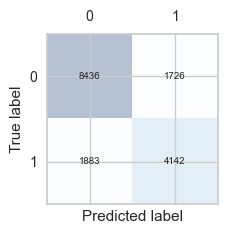

In [19]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

**Let's see how ammount of training data influences accuracy**

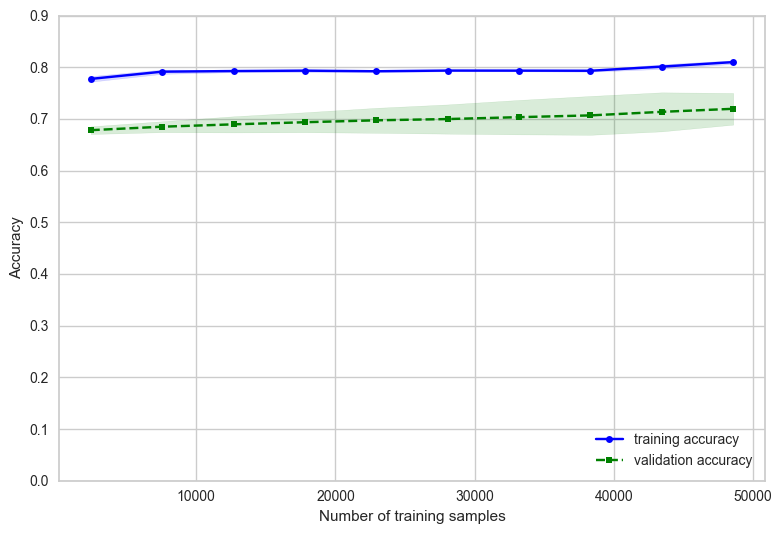

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=5),
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 0.9])
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

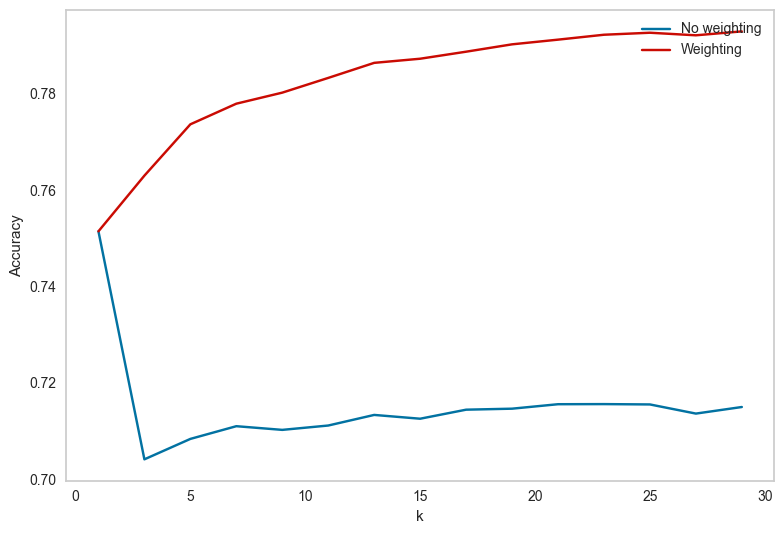

In [11]:
# Encontrar la k automáticamente: 
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=Y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=Y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()